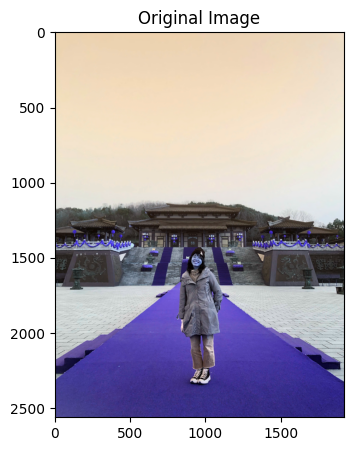

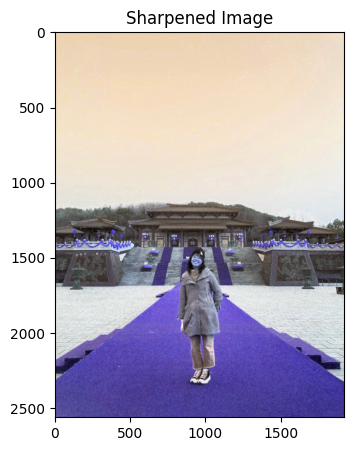

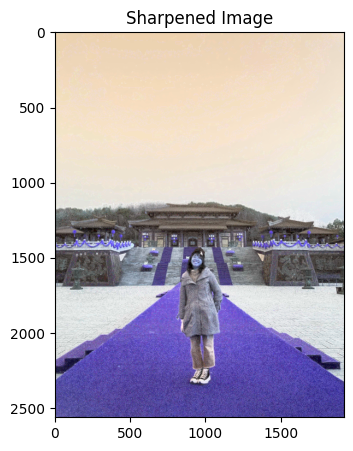

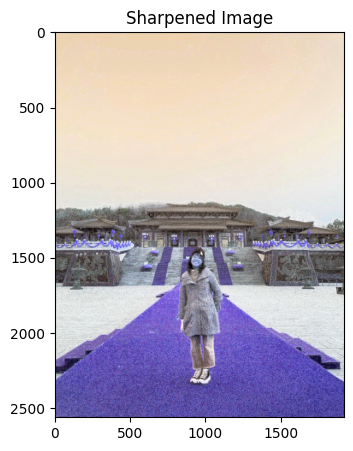

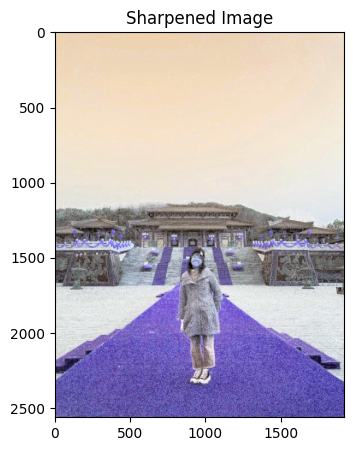

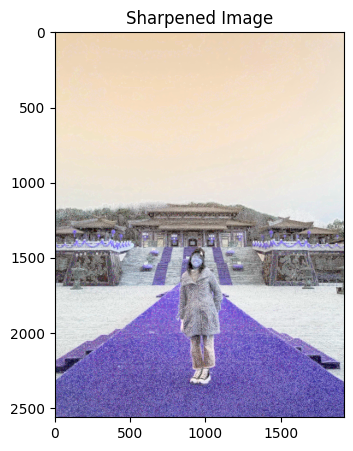

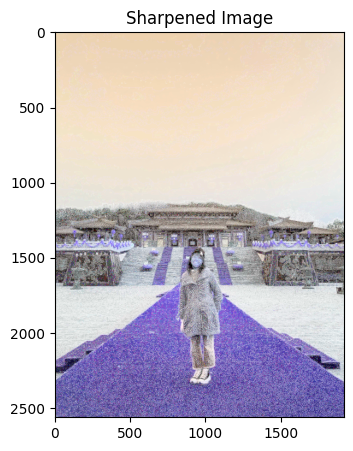

In [11]:
import torch
import torch.nn.functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = "/content/z6264890673028_0cdbdaec42fba76544859a5211cdf292.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image,  cv2.COLOR_BGR2HSV)
f_smooth = cv2.GaussianBlur(image, (5, 5), sigmaX= 1.0)
g = image - f_smooth
i = 0.2
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

while i <= 0.7:
    sharpened = image+ i * g
    i += 0.1
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Sharpened Image")
    plt.imshow(sharpened)


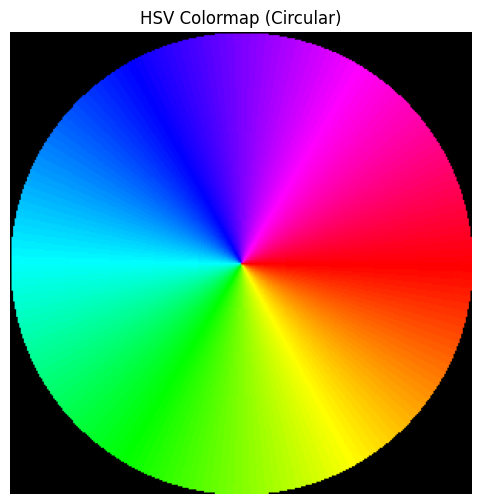

In [13]:
size = 300
hsv_circle = np.zeros((size, size, 3), dtype=np.uint8)

for y in range(size):
    for x in range(size):
        dx = x - size / 2
        dy = y - size / 2
        angle = np.arctan2(dy, dx)
        dist = np.sqrt(dx**2 + dy**2)
        hue = ((np.degrees(angle) + 360) % 360) / 2
        if dist < size / 2:
            hsv_circle[y, x, 0] = int(hue)
            hsv_circle[y, x, 1] = 255
            hsv_circle[y, x, 2] = 255
        else:
            hsv_circle[y, x, :] = 0

rgb_circle = cv2.cvtColor(hsv_circle, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(rgb_circle)
plt.axis('off')
plt.title('HSV Colormap (Circular)')
plt.show()


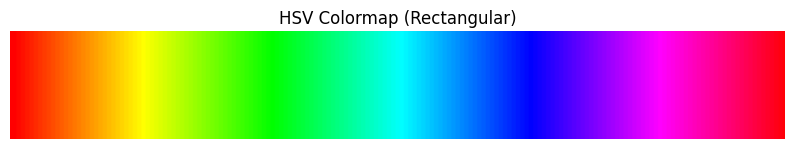

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Create a rectangular HSV colormap
h = np.linspace(0, 179, 360)  # OpenCV hue range is [0, 179]
hsv_rect = np.zeros((50, len(h), 3), dtype=np.uint8)
hsv_rect[:, :, 0] = h  # Hue
hsv_rect[:, :, 1] = 255  # Saturation
hsv_rect[:, :, 2] = 255  # Value

# Convert to RGB
rgb_rect = cv2.cvtColor(hsv_rect, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10, 2))
plt.imshow(rgb_rect)
plt.axis('off')
plt.title('HSV Colormap (Rectangular)')
plt.show()
